# 💻 Forenkling av geometrier

Noen ganger kan det være nyttig å kunne forenkle geometrier. Dette kan være
noe å vurdere for eksempel når du har veldig detaljerte romlige egenskaper
som dekker hele verden. Hvis du lager et kart som dekker hele verden, er det unødvendig å ha veldig detaljerte geometrier fordi det er rett og slett
umulig å se de små detaljene fra kartet ditt. Videre tar det lang tid å faktisk gjengi et stort antall detaljer i et kart. Her vil vi
se hvordan det er mulig å forenkle geometriske egenskaper i Python.


Som eksempel vil vi bruke data som representerer Amazonas-elven i Sør-Amerika og forenkle dens geometrier.

La oss først lese dataene og se hvordan elven ser ut:

In [1]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_MAPPE = NOTEBOOK_PATH / "data"

In [2]:
import geopandas

amazon = geopandas.read_file(DATA_MAPPE / "amazon_river" / "amazon_river.gpkg")

amazon.head()

,bbox_east,bbox_north,bbox_south,bbox_west,place_name,geometry
0,-49.10927,0.70653,-4.44219,-73.450126,"Rio Amazonas, Microrregião de Manaus, Mesorreg...","MULTILINESTRING ((1612358.589 9508606.173, 161..."


In [3]:
amazon.crs

<Projected CRS: PROJCS["Mercator_2SP",GEOGCS["GCS_GRS 1980(IUGG, 1 ...>
Name: Mercator_2SP
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Mercator (variant B)
Datum: unknown
- Ellipsoid: GRS80
- Prime Meridian: Unknown

<Axes: >

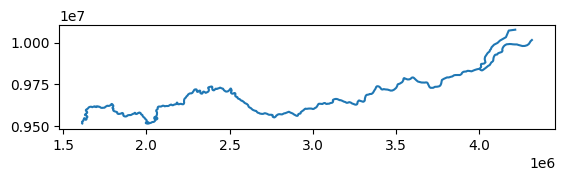

In [4]:
amazon.plot()

LineStringen som presenteres her er ganske detaljert, så la oss se hvordan vi
kan generalisere den litt. Som vi kan se fra koordinasystemet,
er dataene projisert i et system som bruker [Mercator-projeksjon basert på
SIRGAS-datum](http://spatialreference.org/ref/sr-org/7868/), og meter som enhet. 

Generalisering kan enkelt gjøres ved å bruke en Shapely funksjon kalt
`.simplify()`. `tolerance`-parameteren kan brukes til å justere hvor mye
geometrier skal generaliseres. **Toleranseverdien er knyttet til
koordinatsystemet til geometriene**. Derfor er verdien vi gir her 20 000
**meter** (20 kilometer).

<Axes: >

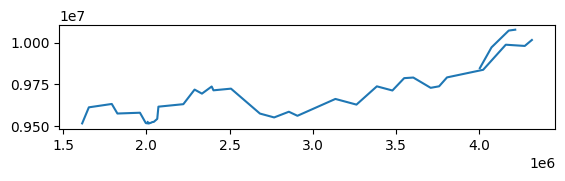

In [5]:
# Generaliser geometri
amazon['simplegeom'] = amazon.simplify(tolerance=20000)

# Sett geometri til å være vår nye forenklede geometri
amazon = amazon.set_geometry('simplegeom')

# Plott 
amazon.plot()

Flott! Som et resultat har vi nå forenklet vår LineString ganske betydelig som vi kan se fra kartet.